In [293]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Introducción


Con el objetivo de buscar potenciales fármacos contra el cáncer dentro de la base de datos.

##Análisis Exploratorio de Datos (EDA)


In [294]:
# Cargar los datos del CSV en un DataFrame
df = pd.read_csv("UML_2024.csv", sep=',')

# Mostrar las 5 primeras filas del DataFrame
df.head(3)

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81


In [295]:
df.shape

(300, 39)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

Esta raro que el ID sea de tipo Objet, verificar por que

In [297]:
df.isna().sum()

cid                              0
Molecular_weight                 0
LogP                             0
Number_of_HBA_1                  0
Number_of_HBA_2                  0
Number_of_HBD_1                  0
Number_of_HBD_2                  0
Number_of_acidic_groups          0
Number_of_aliphatic_OH_groups    0
Number_of_basic_groups           0
Fraction_of_rotatable_bonds      0
Number_of_heavy_bonds            0
Number_of_heterocycles           0
Number_of_hydrophobic_groups     0
MolarRefractivity                0
Number_of_atoms                  0
Number_of_halogen_atoms          0
Number_of_B_atoms                0
Number_of_Br_atoms               0
Number_of_Cl_atoms               0
Number_of_I_atoms                0
Number_of_F_atoms                0
Number_of_N_atoms                0
Number_of_O_atoms                0
Number_of_P_atoms                0
Number_of_S_atoms                0
Number_of_bonds                  0
Number_of_NO2_groups             0
Number_of_SO_groups 

Eliminar la fila en donde está la columna 'Geometrical_shape_coefficient'

In [298]:
df.isna().sum().sum()

1

In [299]:
df = df.dropna(subset=['Geometrical_shape_coefficient'])

In [300]:
df.isna().sum().sum()

0

**¿Qué atributos tenemos?**

In [301]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,299.0,3.591029e+07,4.070267e+07,1046.000000,5.281232e+06,1.388347e+07,6.895019e+07,1.560257e+08
Molecular_weight,299.0,3.351035e+02,1.431022e+02,122.115432,1.856230e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,299.0,7.947166e+00,6.128274e+00,-1.765100,2.403450e+00,6.700400e+00,1.358675e+01,4.037570e+01
Number_of_HBA_1,299.0,3.017391e+01,1.828989e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,299.0,4.448161e+00,1.209507e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,299.0,1.431438e+00,8.657240e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,299.0,1.498328e+00,1.168302e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,299.0,3.244147e-01,5.230646e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,299.0,5.551839e-01,9.265645e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,299.0,4.347826e-02,2.863493e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


Se procede a ver la distribución de cada feature que se tiene

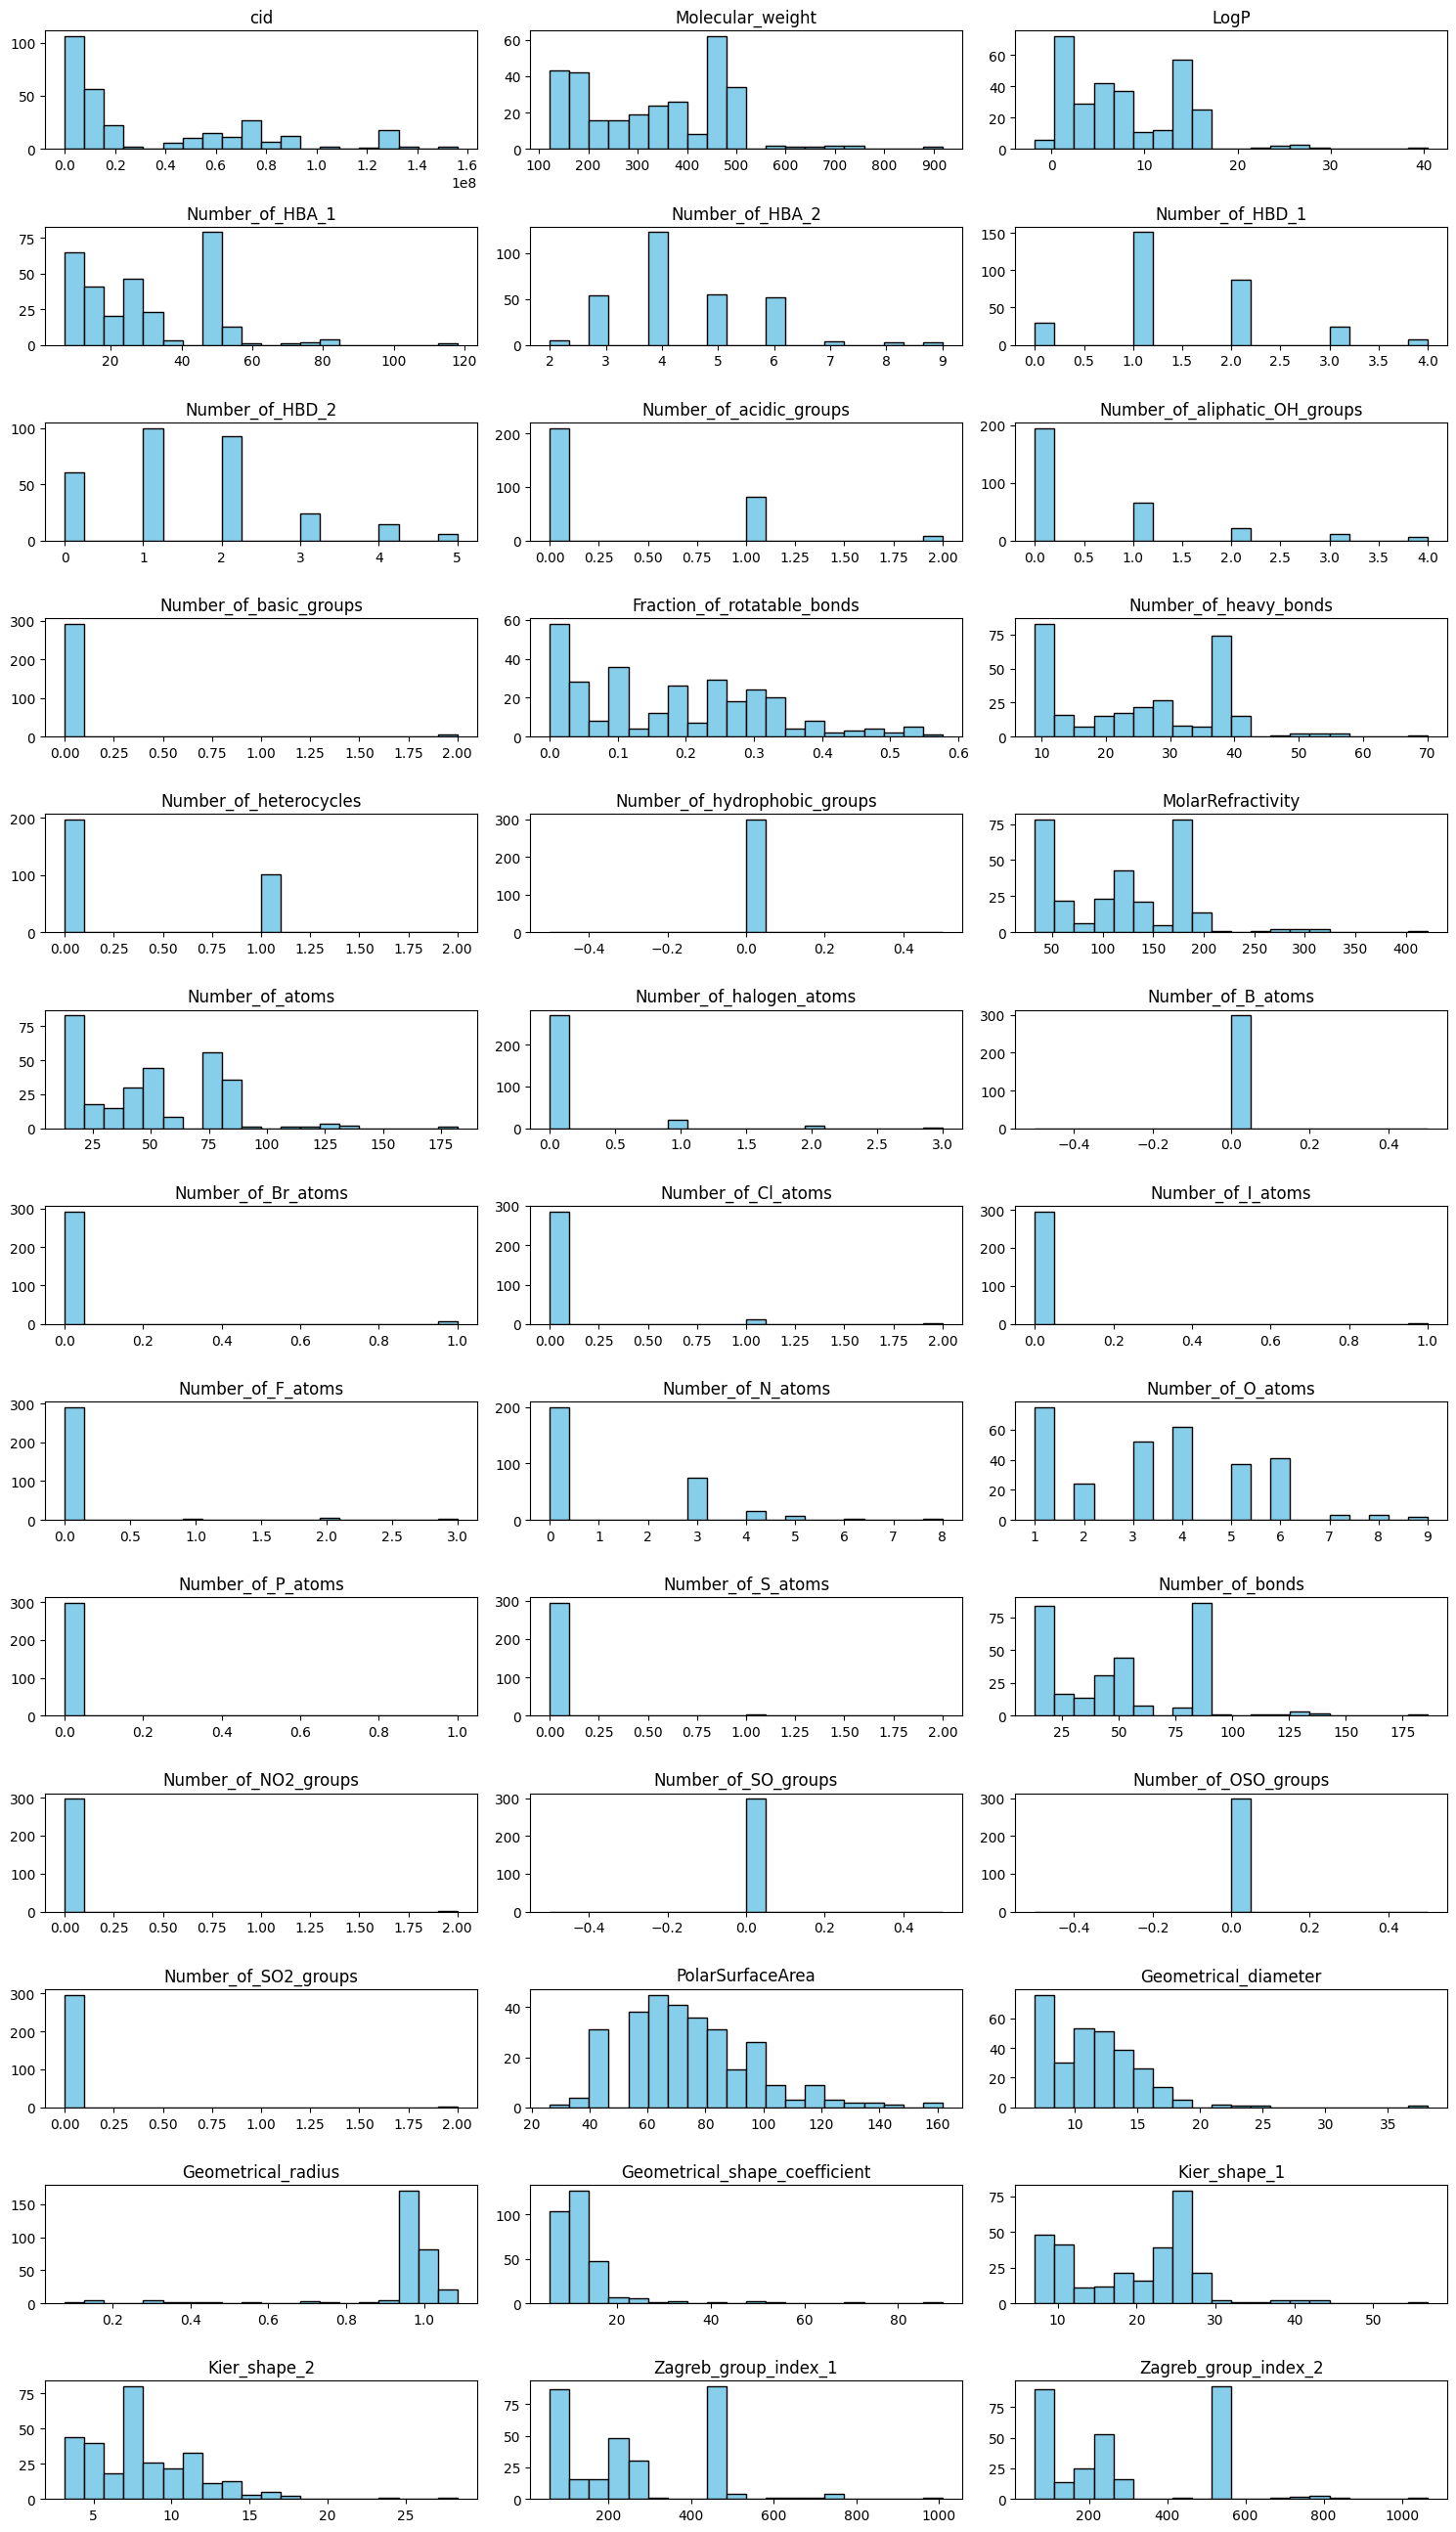

In [302]:
def plot_histograms(data):
    num_columns = data.shape[1]
    rows = (num_columns // 3) + (num_columns % 3 > 0)  # Determinar el número de filas necesarias para el subplot

    plt.figure(figsize=(15, 2 * rows))  # Ajustar el tamaño total de la figura

    for i, column in enumerate(data.columns):
        plt.subplot(rows, 3, i+1)  # Crear un subplot para cada columna
        plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(column)

    plt.tight_layout()
    plt.show()

# Trazando los histogramas
plot_histograms(df)

Se observa la columna 'Number_of_hydrophobic_groups' solo son ceros, por eso se elimina.
Se hace lo mismo con las variables:


*   Number_of_basic_groups
* Number_of_B_atoms
* Number_of_Br_atoms
* Number_of_I_atoms
* Number_of_F_atoms
* Number_of_P_atoms
* Number_of_S_atoms
* Number_of_NO2_groups
* Number_of_SO_groups
* Number_of_OSO_groups
* Number_of_SO2_groups


In [303]:
columns_to_drop=['Number_of_hydrophobic_groups','Number_of_basic_groups','Number_of_B_atoms','Number_of_I_atoms','Number_of_Br_atoms','Number_of_F_atoms','Number_of_P_atoms','Number_of_S_atoms','Number_of_NO2_groups','Number_of_SO_groups','Number_of_OSO_groups','Number_of_SO2_groups']

In [304]:
#Eliminando las columnas
df = df.drop(columns=columns_to_drop)
df.head(3)

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Fraction_of_rotatable_bonds,...,Number_of_O_atoms,Number_of_bonds,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0.111111,...,1,14,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,0.166667,...,1,19,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0.100000,...,1,18,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81


In [305]:
df.shape

(299, 27)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            299 non-null    int64  
 1   Molecular_weight               299 non-null    float64
 2   LogP                           299 non-null    float64
 3   Number_of_HBA_1                299 non-null    int64  
 4   Number_of_HBA_2                299 non-null    int64  
 5   Number_of_HBD_1                299 non-null    int64  
 6   Number_of_HBD_2                299 non-null    int64  
 7   Number_of_acidic_groups        299 non-null    int64  
 8   Number_of_aliphatic_OH_groups  299 non-null    int64  
 9   Fraction_of_rotatable_bonds    299 non-null    float64
 10  Number_of_heavy_bonds          299 non-null    int64  
 11  Number_of_heterocycles         299 non-null    int64  
 12  MolarRefractivity              299 non-null    float64


In [307]:
# Librerías adicionales para clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

###Normalizando
Dado que K-means es sensible a las escalas de las variables, es importante normalizar tus datos.

In [308]:
# Normalización de los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

#Kmeans

In [309]:
# Aplicación de K-means con varios números de clusters
wcss = []
silhouette_coefficients = []

for k in range(2, 11):  # Probamos desde 2 hasta 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##Elbow plot

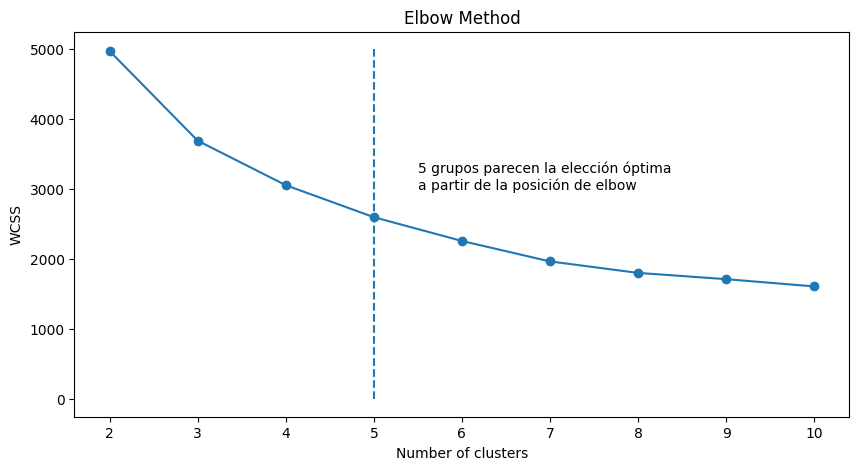

In [310]:
# Diagrama de codo
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.vlines(x=5,ymin=0,ymax=5000,linestyles='--')
plt.text(x=5.5,y=3000,s='5 grupos parecen la elección óptima\na partir de la posición de elbow ',
             fontsize=10,fontdict={'family':'Arial'})
plt.show()

##diagrama de silhouette

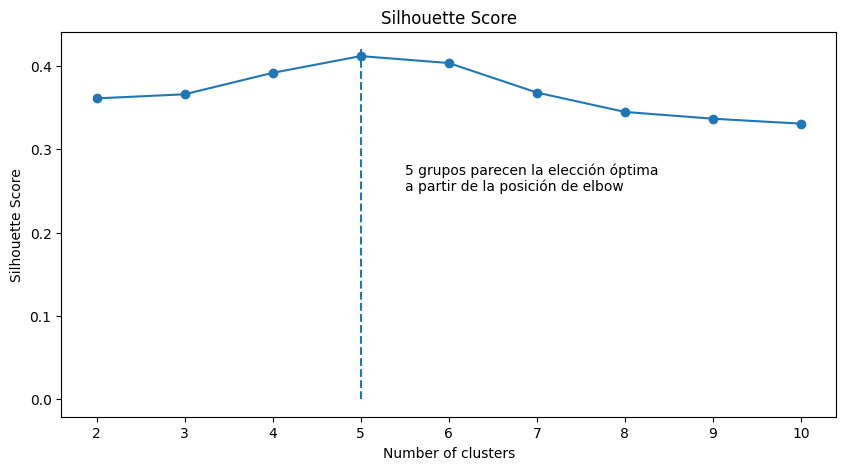

In [311]:
# Diagrama de silueta
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.vlines(x=5,ymin=0,ymax=0.42,linestyles='--')
plt.text(x=5.5,y=0.25,s='5 grupos parecen la elección óptima\na partir de la posición de elbow ',
             fontsize=10,fontdict={'family':'Arial'})
plt.show()

se puede observar que con 5 Clauster es más optimo

PARA EVALUAR SI SIRVE O NO PARA EL TRATAMIENTO (SERÍAN SUBGRUPOS)

#2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

<ipython-input-312-c57f94d232b7>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-312-c57f94d232b7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-312-c57f94d232b7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


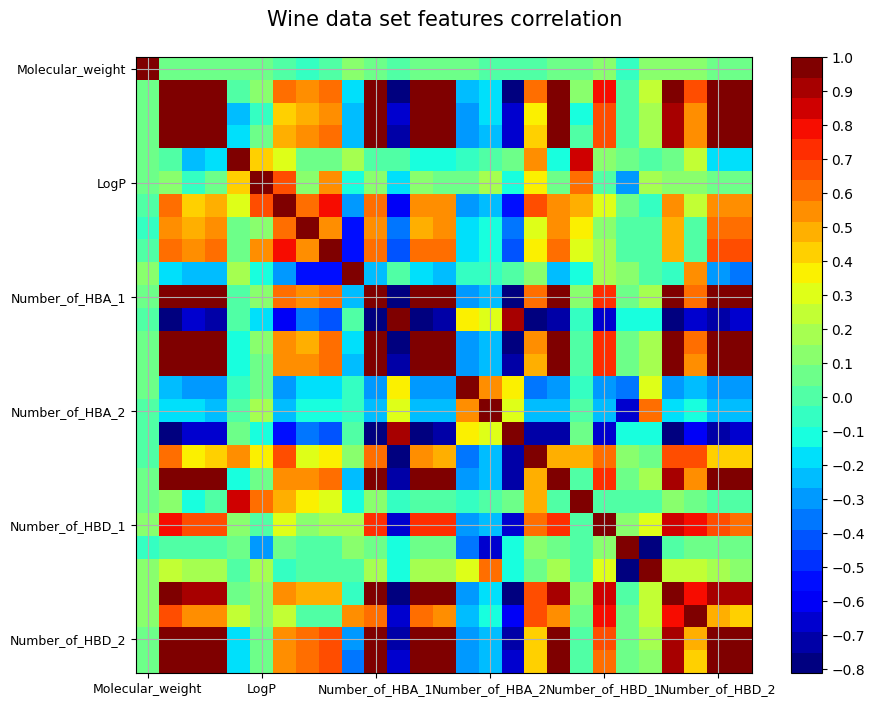

In [312]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

### Escalado de datos
PCA requiere escalado/normalización de los datos para funcionar correctamente

In [313]:
from sklearn.cluster import KMeans

# Suponiendo que df_scaled es tu DataFrame normalizado
# Ajustar KMeans con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# Etiquetar cada observación con el índice del cluster al que pertenece
df['Class'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [314]:
from sklearn.preprocessing import StandardScaler

In [315]:
scaler = StandardScaler()

In [316]:
X = df.drop('Class',axis=1)
y = df['Class']

In [317]:
X = scaler.fit_transform(X)

In [318]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/tools.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


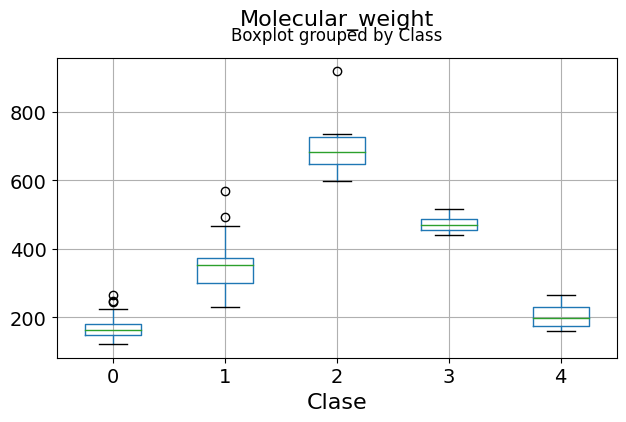

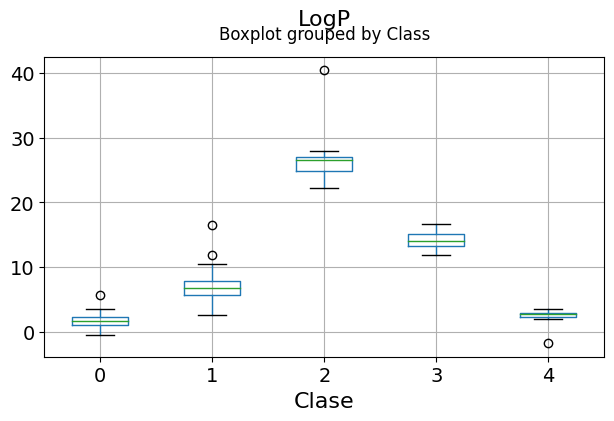

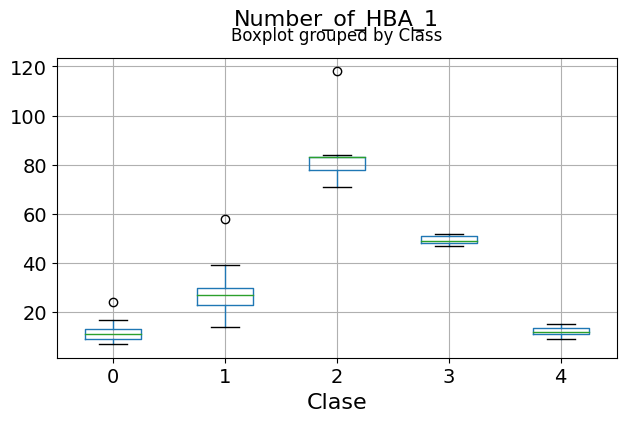

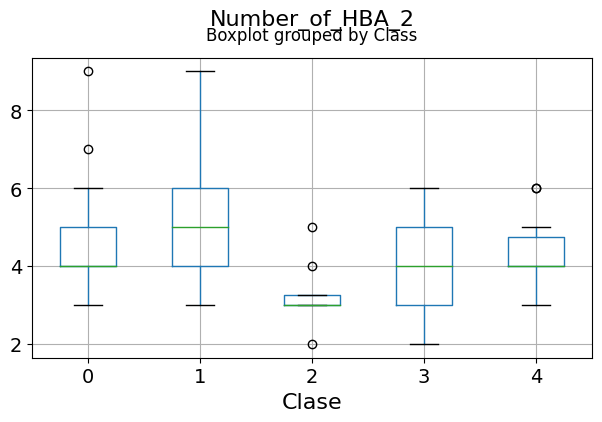

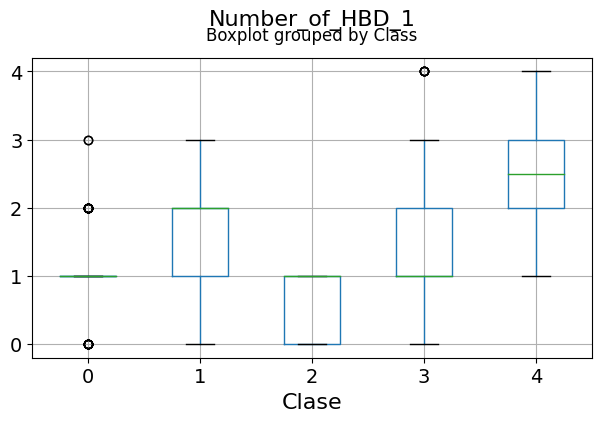

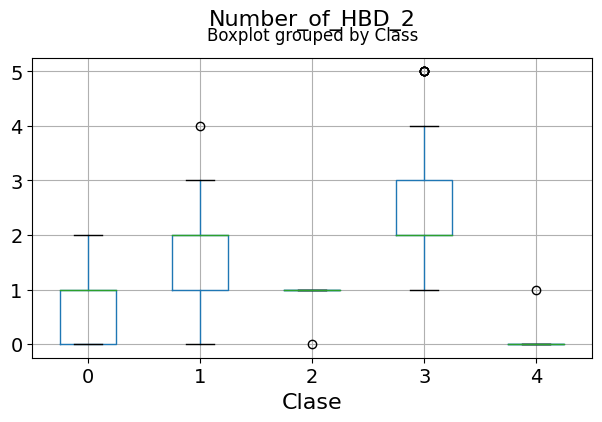

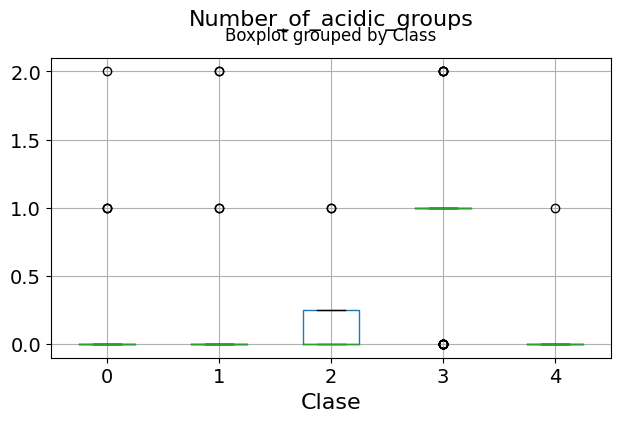

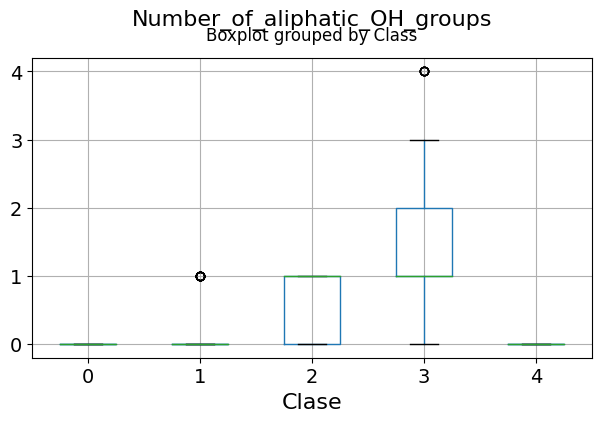

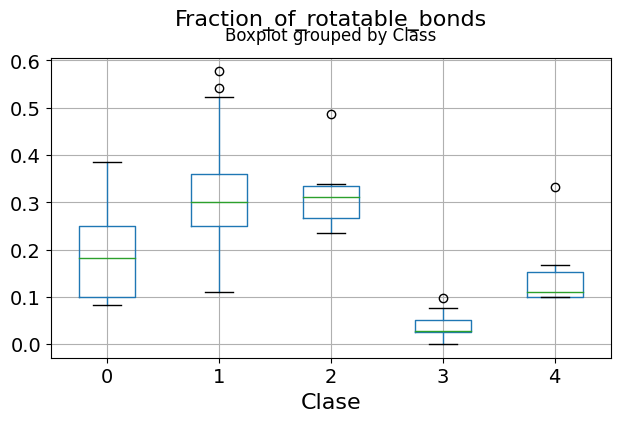

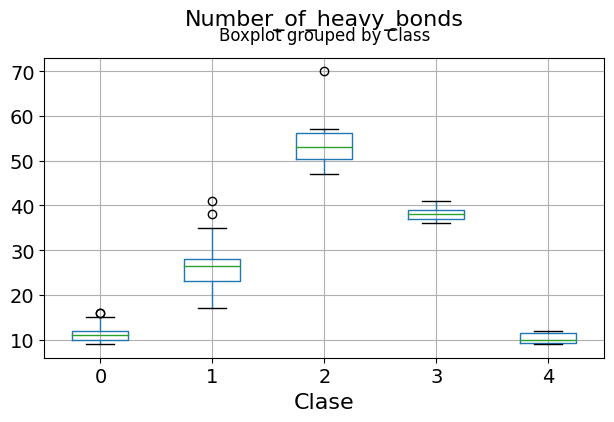

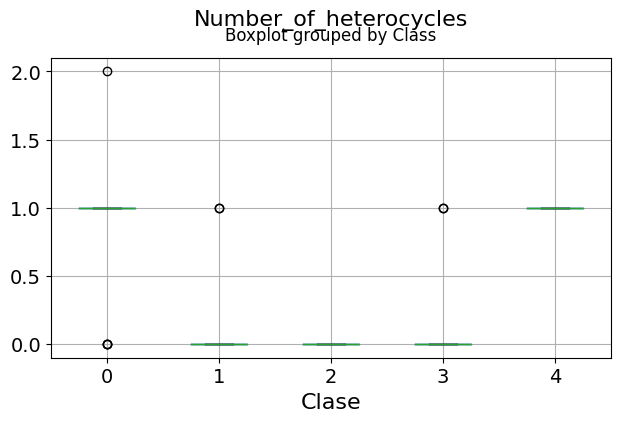

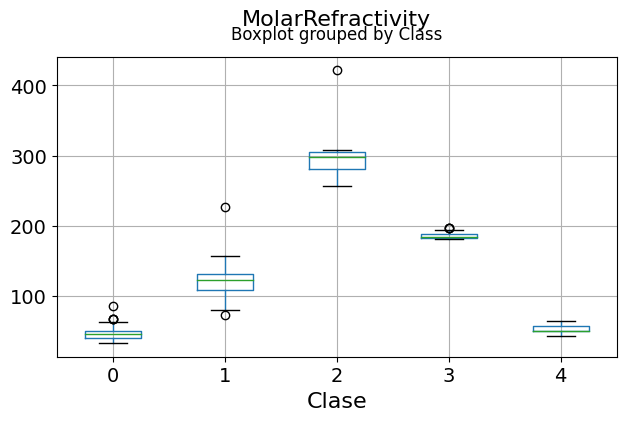

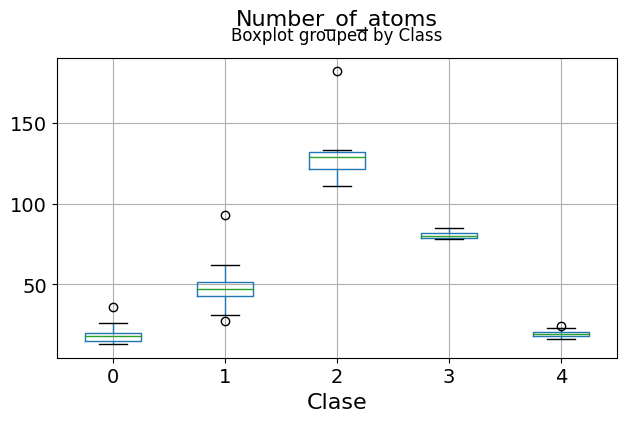

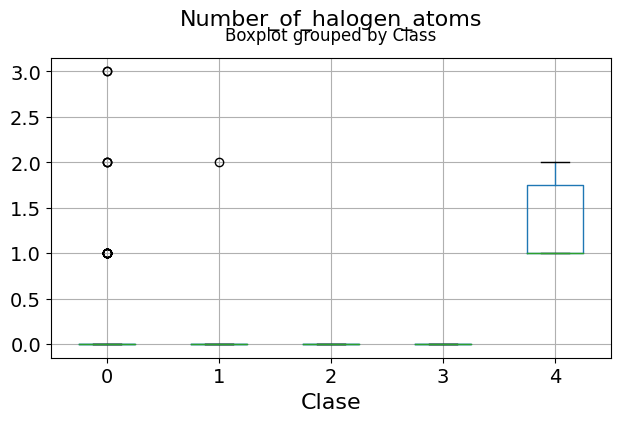

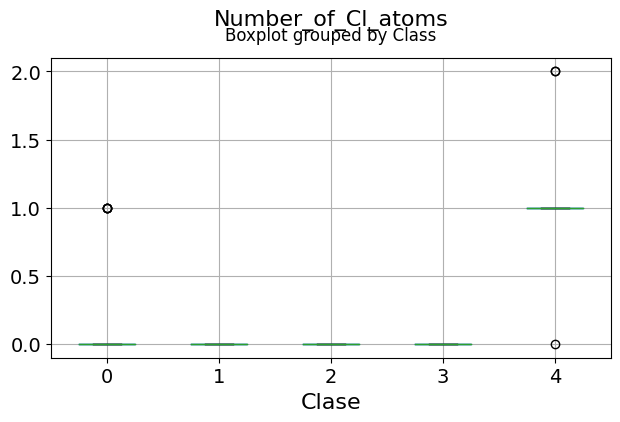

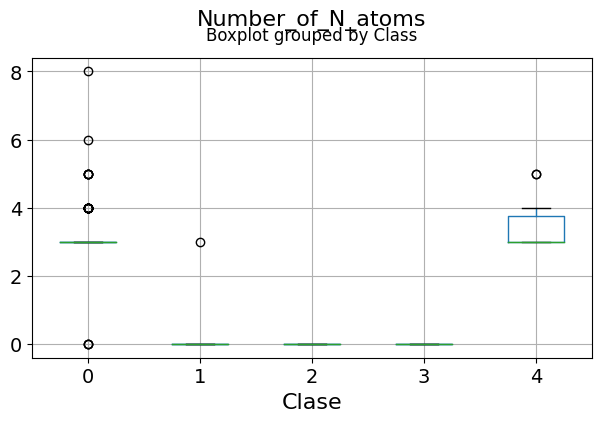

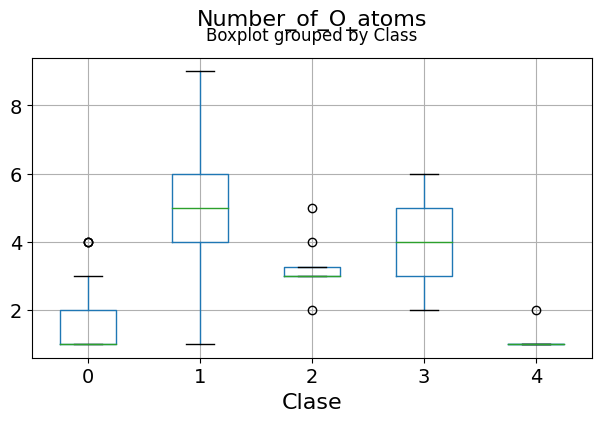

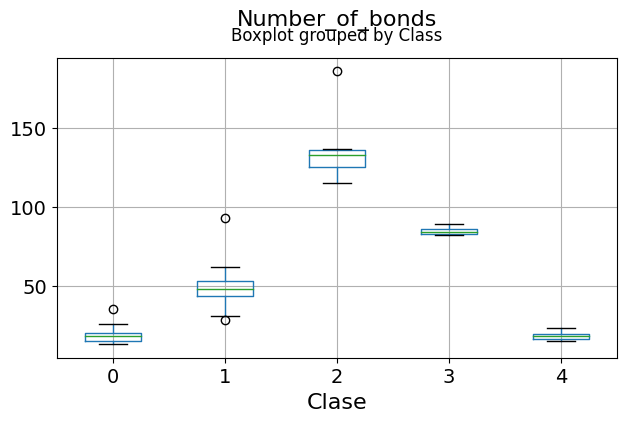

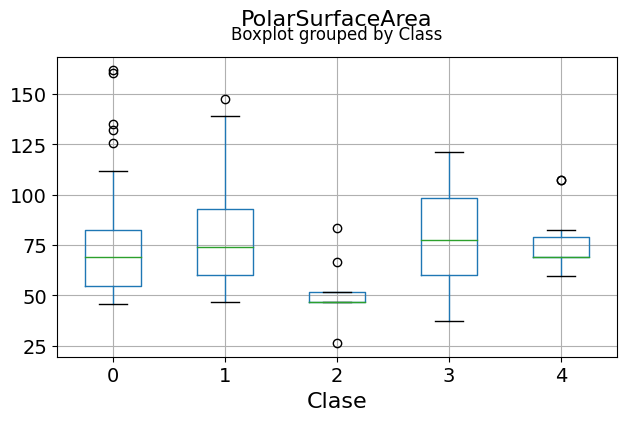

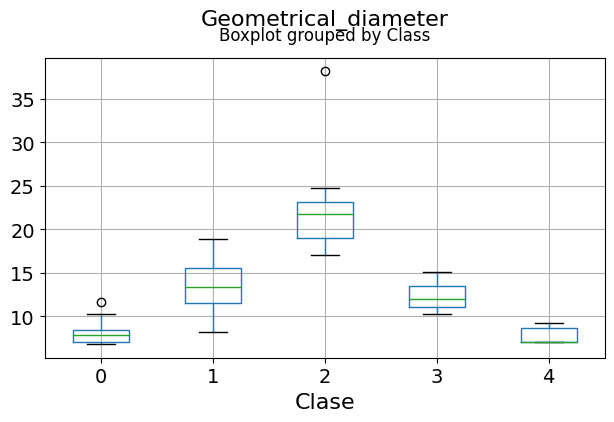

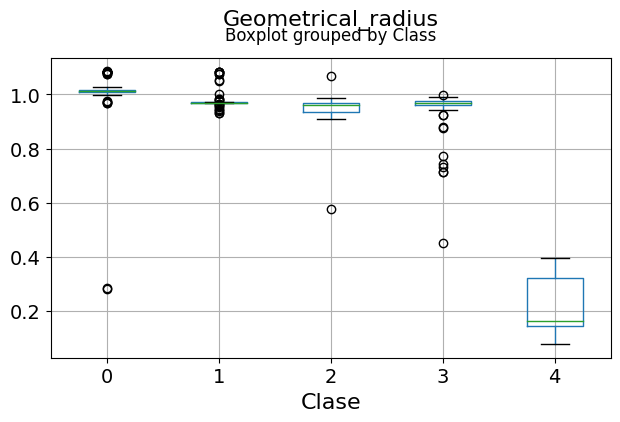

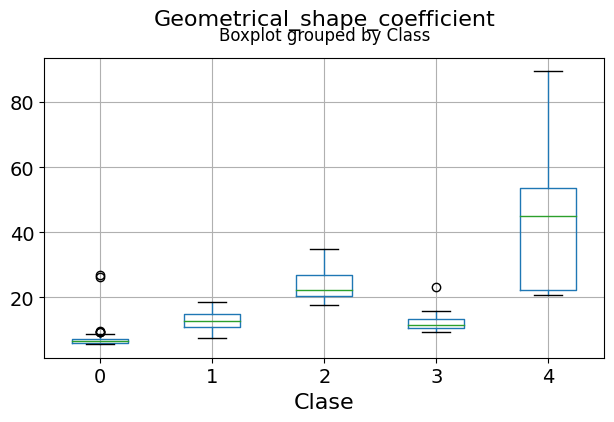

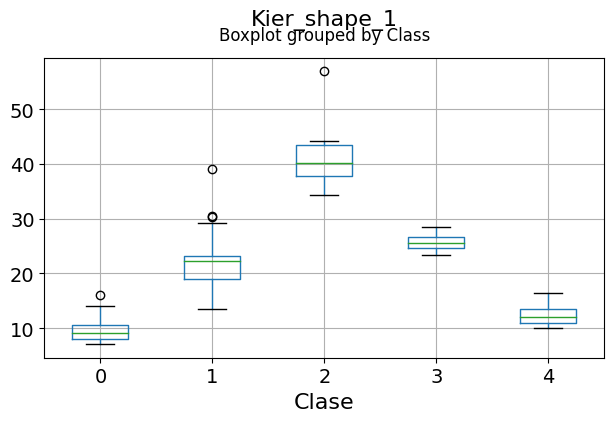

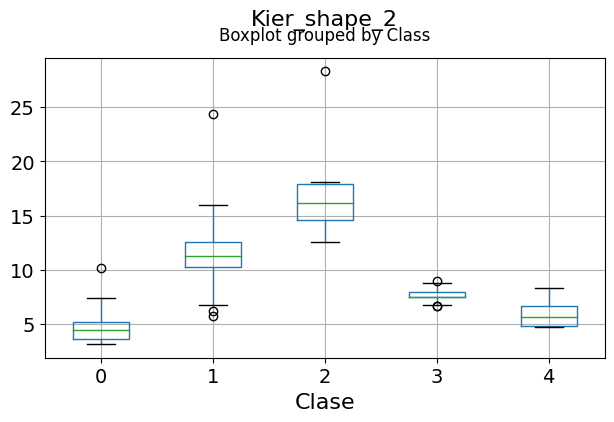

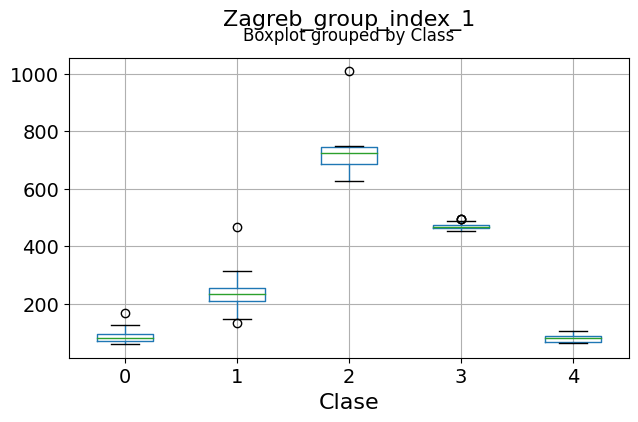

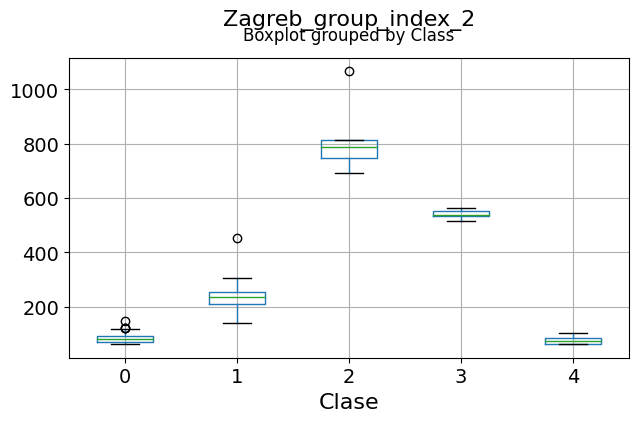

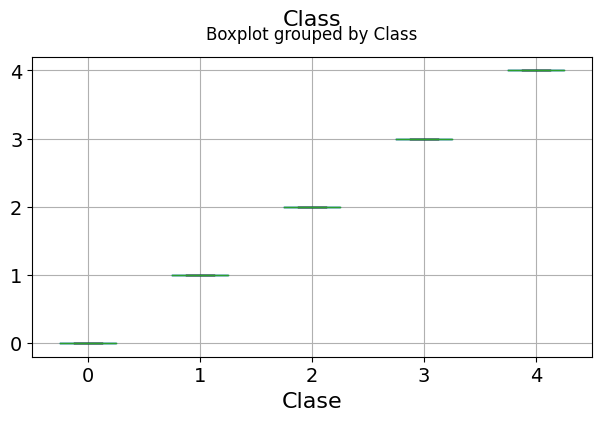

In [319]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Clase", fontsize=16)

### Importación y análisis de clases de PCA

In [320]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

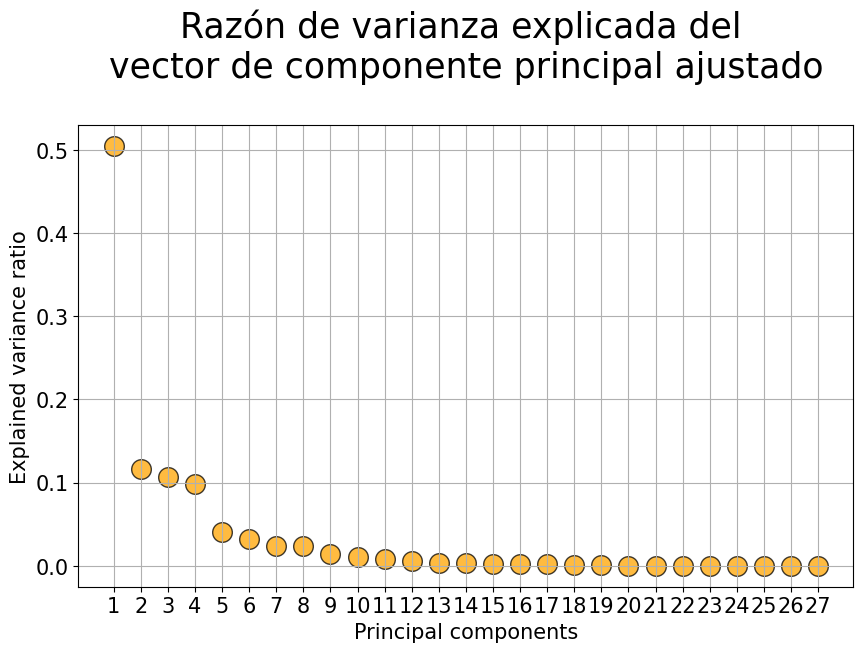

In [321]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Razón de varianza explicada del \nvector de componente principal ajustado\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [323]:
# Ajustar PCA para calcular todos los componentes
pca = PCA()
pca.fit(df_scaled)

# Calcular la varianza acumulada
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Encontrar el número mínimo de componentes que preservan al menos el 95% de la varianza
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

print(f"Número de componentes necesarios para preservar el 95% de la varianza: {n_components_95}")

Número de componentes necesarios para preservar el 95% de la varianza: 9


#3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

In [322]:
# Determinar el número óptimo de clusters (asumiendo que ya se ha hecho, por ejemplo 5)
optimal_k = 5

# Ajustar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

# Usar los centroides como una nueva representación reducida de los datos
centroids = kmeans.cluster_centers_

# Cada fila en `centroids` representa la posición central de un cluster en el espacio original,
# actuando como una reducción a `optimal_k` dimensiones.
print("Centroides como nueva representación reducida:")
print(centroids)


Centroides como nueva representación reducida:
[[-4.45216672e-02 -1.17544623e+00 -1.00777857e+00 -1.02601832e+00
  -3.44246098e-02 -3.97473009e-01 -7.75859364e-01 -5.16038409e-01
  -6.00189958e-01  1.32056874e-02 -1.15497304e+00  1.31389307e+00
  -1.13760843e+00 -1.08466400e+00  3.12951596e-01 -2.51424810e-02
   1.29293918e+00 -1.07334794e+00 -1.07876222e+00 -7.35937686e-02
  -9.79062337e-01  3.31743251e-01 -6.03582878e-01 -1.21443784e+00
  -9.92139933e-01 -1.03455160e+00 -1.00269976e+00]
 [ 1.05529802e-02  7.00655801e-02 -1.75376771e-01 -1.81089652e-01
   4.48565667e-01  1.26554838e-01  7.14237708e-02 -5.04013198e-01
  -4.56783370e-01  9.69015141e-01  3.22319749e-02 -6.72092685e-01
   3.81202930e-04 -1.02509677e-01 -2.51725230e-01 -2.03073885e-01
  -6.57401228e-01  8.25523167e-01 -1.20999175e-01  1.62130103e-02
   5.43848485e-01  1.72371746e-01  6.71051517e-02  2.72369369e-01
   9.02180621e-01 -2.10979287e-01 -2.90608619e-01]
 [ 1.27195793e+00  2.56585492e+00  3.17560947e+00  2.975259

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Referencias


* Data base obtenida de:
https://github.com/inefable12/siderophores_database
(Accedido el 14/04/2024)



